In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
app_counts=application_df['APPLICATION_TYPE'].value_counts()

# uses the variable name `application_types_to_replace`
max_app_counts = 15

application_types_to_replace = app_counts[app_counts<max_app_counts].index.tolist()
# Replaces in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [3]:
class_counts = application_df['CLASSIFICATION'].value_counts()
# uses the variable name `classifications_to_replace`
max_classcount = 25
classifications_to_replace = class_counts[class_counts<max_classcount].index.tolist()
# Replaces in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
Other      227
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [4]:
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [5]:
name_counts = application_df['NAME'].value_counts()
max_namecount = 100
names_to_replace = name_counts[name_counts<max_namecount].index.tolist()
# Replaces in dataframe
for nme in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(nme,"Other")
    
# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [6]:
# Converts categorical data to numeric with `pd.get_dummies`
dummy_cats = ['NAME','APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','STATUS','INCOME_AMT','SPECIAL_CONSIDERATIONS']
dummies_df=pd.get_dummies(application_df, columns=dummy_cats)

dummies_df

,EIN,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10531628,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10547893,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10553066,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,10556103,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,996010315,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,996012607,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,996015768,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:

# Splits  preprocessed data into our features and target arrays
y = dummies_df['IS_SUCCESSFUL'].values
X = dummies_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)



In [8]:
# Creates a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [9]:
len(X_test_scaled[0])

95

In [10]:
# OPTIMIZATION ATTEMPT 1: 'ALTERED BINS, ADDED NEURONS, ADDED EPOCHS'
# using the neuron rule of thumb, but making it two times the amount of features after numericizing the categorical data (190 neurons).

# Defines the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer_1= 2*number_input_features
hidden_nodes_layer_2 = 2*number_input_features
hidden_nodes_layer_3 = 2*number_input_features

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 190)               18240     
                                                                 
 dense_1 (Dense)             (None, 190)               36290     
                                                                 
 dense_2 (Dense)             (None, 1)                 191       
                                                                 
Total params: 54,721
Trainable params: 54,721
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
fit_model = nn1.fit(X_train_scaled,y_train,epochs=150, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/150
804/804 [==============================] - 7s 6ms/step - loss: 0.5116 - accuracy: 0.7444 - val_loss: 0.5091 - val_accuracy: 0.7473
Epoch 2/150
804/804 [==============================] - 4s 5ms/step - loss: 0.4916 - accuracy: 0.7587 - val_loss: 0.4995 - val_accuracy: 0.7516
Epoch 3/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4868 - accuracy: 0.7608 - val_loss: 0.4952 - val_accuracy: 0.7502
Epoch 4/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4851 - accuracy: 0.7610 - val_loss: 0.4945 - val_accuracy: 0.7515
Epoch 5/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4830 - accuracy: 0.7633 - val_loss: 0.4944 - val_accuracy: 0.7507
Epoch 6/150
804/804 [==============================] - 3s 3ms/step - loss: 0.4815 - accuracy: 0.7645 - val_loss: 0.5015 - val_accuracy: 0.7522
Epoch 7/150
804/804 [==============================] - 2s 3ms/step - loss: 0.4807 - accuracy: 0.7653 - val_loss: 0.4945 - val_accuracy: 0.7536

In [13]:
# Evaluates Optimization model 1 using the test data
#Optimization model meets the >75% threshold.
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6053 - accuracy: 0.7513 - 355ms/epoch - 1ms/step
Loss: 0.6052975058555603, Accuracy: 0.7512536644935608


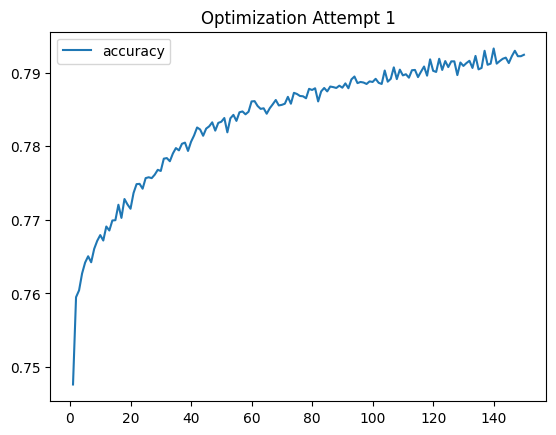

In [22]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="accuracy",title="Optimization Attempt 1")
plt.show()

In [14]:
# Saves Optimization model 1 to HDF5
nn1.save('AlphabetSoupCharity_Optimisation1.h5')

In [15]:
# OPTIMIZATION ATTEMPT #2 REVISED BINS, ADDED LAYER, STEPPED NEURONS, ADDED EPOCHS
## Adding fourth layer (1 input, 2 hidden, 1 output) consisting of the same amount of neurons.
##Neurons are stepped up in size.


hidden_nodes_layer_1= number_input_features
hidden_nodes_layer_2 = 2*number_input_features
hidden_nodes_layer_3 = 3*number_input_features
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))


# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer_3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 95)                9120      
                                                                 
 dense_4 (Dense)             (None, 190)               18240     
                                                                 
 dense_5 (Dense)             (None, 285)               54435     
                                                                 
 dense_6 (Dense)             (None, 1)                 286       
                                                                 
Total params: 82,081
Trainable params: 82,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiles the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
fit_model = nn2.fit(X_train_scaled,y_train,epochs=150, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/150
804/804 [==============================] - 4s 4ms/step - loss: 0.5115 - accuracy: 0.7476 - val_loss: 0.4979 - val_accuracy: 0.7486
Epoch 2/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4904 - accuracy: 0.7595 - val_loss: 0.4987 - val_accuracy: 0.7513
Epoch 3/150
804/804 [==============================] - 4s 5ms/step - loss: 0.4858 - accuracy: 0.7604 - val_loss: 0.4971 - val_accuracy: 0.7522
Epoch 4/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4846 - accuracy: 0.7627 - val_loss: 0.4965 - val_accuracy: 0.7532
Epoch 5/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4821 - accuracy: 0.7642 - val_loss: 0.4922 - val_accuracy: 0.7515
Epoch 6/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4813 - accuracy: 0.7650 - val_loss: 0.4931 - val_accuracy: 0.7522
Epoch 7/150
804/804 [==============================] - 4s 5ms/step - loss: 0.4797 - accuracy: 0.7642 - val_loss: 0.4954 - val_accuracy: 0.7513

In [18]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.7539
Loss: 0.6888048648834229, Accuracy: 0.7539358735084534


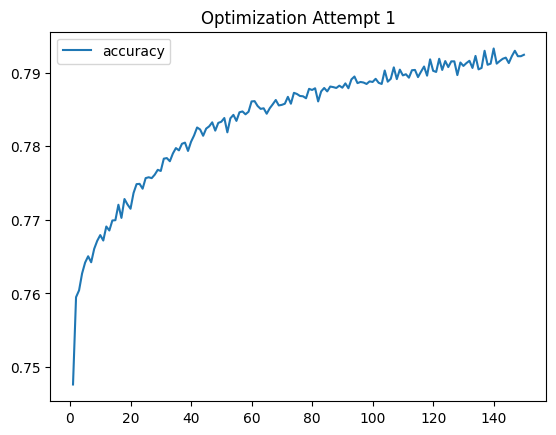

In [21]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="accuracy",title="Optimization Attempt 2")
plt.show()

In [23]:
nn2.save('AlphabetSoupCharity_Optimisation2.h5')

In [28]:
#OPTIMIZATION MODEL 3 (REVISED BINS, REDUCED INPUT FEATURES, MAXIMUM NEURONS, INCREASED EPOCHS)
reduced_df=application_df.drop(columns=['CLASSIFICATION',"SPECIAL_CONSIDERATIONS"])
reduced_dummy_cats = ['NAME','AFFILIATION','APPLICATION_TYPE','STATUS','USE_CASE','ORGANIZATION','INCOME_AMT']
reduced_dummies = pd.get_dummies(reduced_df, columns = reduced_dummy_cats)
reduced_dummies

,EIN,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,10520599,5000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10531628,108590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10547893,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,10553066,6692,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,10556103,142590,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,996010315,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,996012607,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,996015768,5000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Splits our preprocessed data into our features and target arrays
y = reduced_dummies['IS_SUCCESSFUL'].values
X = reduced_dummies.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Defines the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer_1= 3*number_input_features
hidden_nodes_layer_2 = 3*number_input_features
hidden_nodes_layer_3 = 3*number_input_features

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=number_input_features, activation="ReLU")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="ReLU"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_3, activation="ReLU"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 216)               15768     
                                                                 
 dense_12 (Dense)            (None, 216)               46872     
                                                                 
 dense_13 (Dense)            (None, 216)               46872     
                                                                 
 dense_14 (Dense)            (None, 1)                 217       
                                                                 
Total params: 109,729
Trainable params: 109,729
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compiles the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
fit_model = nn3.fit(X_train_scaled,y_train,epochs=150, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/150
804/804 [==============================] - 5s 4ms/step - loss: 0.5175 - accuracy: 0.7378 - val_loss: 0.5147 - val_accuracy: 0.7364
Epoch 2/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5045 - accuracy: 0.7437 - val_loss: 0.5125 - val_accuracy: 0.7383
Epoch 3/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5010 - accuracy: 0.7463 - val_loss: 0.5066 - val_accuracy: 0.7390
Epoch 4/150
804/804 [==============================] - 4s 5ms/step - loss: 0.5000 - accuracy: 0.7462 - val_loss: 0.5062 - val_accuracy: 0.7410
Epoch 5/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4986 - accuracy: 0.7463 - val_loss: 0.5081 - val_accuracy: 0.7383
Epoch 6/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4981 - accuracy: 0.7483 - val_loss: 0.5057 - val_accuracy: 0.7401
Epoch 7/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4966 - accuracy: 0.7475 - val_loss: 0.5080 - val_accuracy: 0.7425

In [34]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.7427
Loss: 0.6915854811668396, Accuracy: 0.7427405118942261


In [35]:
nn3.save('AlphabetSoupCharity_Optimisation3.h5')